In [2]:
import imageio
from skimage.transform import rescale
import numpy as np
import operator
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [3]:
image_file = "../data/CAT_00/00000001_020.jpg"
image = imageio.imread(image_file)
image_target_size = (375, 375)

In [4]:
image.shape

(375, 500, 3)

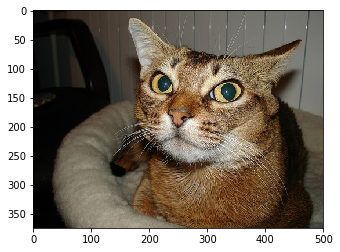

In [5]:
plt.imshow(image, interpolation='none')
plt.show()

In [6]:
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

image = cropND(image, image_target_size)

In [7]:
image = rescale(image=image, scale=0.5, multichannel=True, anti_aliasing=True)

/home/alex/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
image.shape

(188, 188, 3)

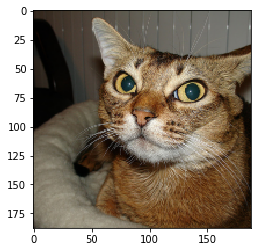

In [9]:
plt.imshow(image, interpolation='none')
plt.show()

In [10]:
def reshape_to_vec(img):
    return img.reshape(img.shape[0]*img.shape[1], 3)

def reshape_vec_to_img(img):
    return img.reshape(int(math.sqrt(img.shape[0])), int(math.sqrt(img.shape[0])), 3)

In [11]:
image = reshape_to_vec(image)

In [12]:
image.shape

(35344, 3)

In [13]:
reshape_vec_to_img(image).shape

(188, 188, 3)